In [ ]:
%pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
#Incluyendo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#Cargamos los dataset

In [4]:
#Preguntas y respuestas - español
data1 = load_dataset("bertin-project/alpaca-spanish")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

(…)-00000-of-00001-3a8ceb2c27df896f.parquet:   0%|          | 0.00/13.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/51942 [00:00<?, ? examples/s]

Examinamos que tipo son

In [5]:
print("data 1:")
print(data1)

data 1:
DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output'],
        num_rows: 51942
    })
})


Convertir los dataset a dataframe

In [6]:
data1 = data1['train'].to_pandas()

Revisamos las primeras lineas de los dataframe

In [7]:
print("Data 1:")
data1.head()

Data 1:


,instruction,input,output
0,¿Qué significa DNA?,,DNA significa ácido desoxirribonucleico.
1,¿Cuál es la capital de Francia?,,La capital de Francia es París.
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.
4,Encuentra la capital de España.,,La capital de España es Madrid.


Agregamos y eliminamos columnas

In [8]:
print(data1.columns)

Index(['instruction', 'input', 'output'], dtype='object')


Juntamos los dataframe en uno solo

In [9]:
final_df = data1

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51942 entries, 0 to 51941
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  51942 non-null  object
 1   input        51942 non-null  object
 2   output       51942 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [11]:
final_df.describe()

,instruction,input,output
count,51942,51942,51942
unique,51930,19147,50814
top,Encuentra la palabra que no pertenece al grupo.,,2
freq,2,31997,36


In [12]:
final_df.head()

,instruction,input,output
0,¿Qué significa DNA?,,DNA significa ácido desoxirribonucleico.
1,¿Cuál es la capital de Francia?,,La capital de Francia es París.
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.
4,Encuentra la capital de España.,,La capital de España es Madrid.


In [13]:
final_df.tail()

,instruction,input,output
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,..."
51938,Generar una receta para arroz frito vegano.,,Ingredientes:\n- 2 cucharadas de mantequilla v...
51939,Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty\nMercado: Marketi...,Spotty es una empresa startup en el espacio de...
51940,Analizar el documento legal proporcionado y ex...,Lo siguiente es un extracto de un contrato ent...,Este documento legal establece que la Compañía...
51941,Generar un ejemplo de cómo debería ser un curr...,,"Jean Tremaine\n1234 Main Street, Anytown, CA 9..."


Revisar si hay filas duplicadas

In [14]:
duplicados = final_df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


#Limpieza de datos

In [15]:
# cantidad de nulos para el primer dataset
cantidad_nulos = (final_df.isnull().sum())
print(cantidad_nulos)

instruction    0
input          0
output         0
dtype: int64


In [16]:
import re
import nltk

In [17]:
pattern = r'''(?x)                 # set flag to allow verbose regexps
              (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
              | \w+(?:-\w+)*       # words with optional internal hyphens
              | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
              | \.\.\.             # ellipsis
              | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''

In [18]:
# Función para aplicar regex sobre el texto y clasificar los tokens
def extract_tokens(text):

    if not isinstance(text, str):
        return pd.Series({
            'abbreviations': '',
            'words': '',
            'currency_percent': '',
            'ellipsis': '',
            'punctuation': ''
        })


    matches = re.findall(pattern, text)

    abbreviations = []
    words = []
    currency_percent = []
    ellipsis = []
    punctuation = []

    for match in matches:
        if re.match(r'(?:[A-Z]\.)+', match):  # Abreviaciones
            abbreviations.append(match)
        elif re.match(r'\w+(?:-\w+)*', match):  # Palabras con guiones opcionales
            words.append(match)
        elif re.match(r'\$?\d+(?:\.\d+)?%?', match):  # Moneda y porcentajes
            currency_percent.append(match)
        elif match == '...':  # Elipsis
            ellipsis.append(match)
        elif re.match(r'[][.,;"\'?():-_`]', match):  # Puntuación
            punctuation.append(match)

    return pd.Series({
        'abbreviations': ', '.join(abbreviations),
        'words': ', '.join(words),
        'currency_percent': ', '.join(currency_percent),
        'ellipsis': ', '.join(ellipsis),
        'punctuation': ', '.join(punctuation)
    })

# Lista de columnas de texto en las que deseas aplicar el regex
columns_to_tokenize = ['instruction', 'input', 'output']

# Iterar sobre cada columna y aplicar la función extract_tokens
for column in columns_to_tokenize:
    # Aplicar extract_tokens a cada columna de texto
    tokenized_df = final_df[column].apply(extract_tokens)

    # Cambiar los nombres de las columnas para evitar sobreescribir
    tokenized_df = tokenized_df.add_prefix(f"{column}_")

    # Unir el DataFrame original con las nuevas columnas tokenizadas
    final_df = pd.concat([final_df, tokenized_df], axis=1)


In [19]:
final_df

,instruction,input,output,instruction_abbreviations,instruction_words,instruction_currency_percent,instruction_ellipsis,instruction_punctuation,input_abbreviations,input_words,input_currency_percent,input_ellipsis,input_punctuation,output_abbreviations,output_words,output_currency_percent,output_ellipsis,output_punctuation
0,¿Qué significa DNA?,,DNA significa ácido desoxirribonucleico.,,"Qué, significa, DNA",,,?,,,,,,,"DNA, significa, ácido, desoxirribonucleico",,,.
1,¿Cuál es la capital de Francia?,,La capital de Francia es París.,,"Cuál, es, la, capital, de, Francia",,,?,,,,,,,"La, capital, de, Francia, es, París",,,.
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,,"Identifica, el, que, no, encaja",,,.,,"Twitter, Instagram, Telegram",,,",, ,",,Telegram,,,
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.,,"Traduisez, la, phrase, suivante, en, français",,,.,,"I, miss, you",,,,,"Je, te, manque",,,.
4,Encuentra la capital de España.,,La capital de España es Madrid.,,"Encuentra, la, capital, de, España",,,.,,,,,,,"La, capital, de, España, es, Madrid",,,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...",,"Crea, un, cuestionario, para, un, tema, de, tu...",,,.,,Scooby-Doo,,,,,"1, En, qué, año, se, estrenó, la, serie, Scoob...",,,"., ,, ?, ., ., ., ., ., ?, ., "", "", ., "", "", ...."
51938,Generar una receta para arroz frito vegano.,,Ingredientes:\n- 2 cucharadas de mantequilla v...,,"Generar, una, receta, para, arroz, frito, vegano",,,.,,,,,,,"Ingredientes, 2, cucharadas, de, mantequilla, ...",,,":, ,, ,, ,, ,, ,, ,, ,, :, ., ., ., ,, ., ., ...."
51939,Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty\nMercado: Marketi...,Spotty es una empresa startup en el espacio de...,,"Crear, un, análisis, de, mercado, para, una, e...",,,.,,"Nombre, de, la, empresa, Spotty, Mercado, Mark...",,,":, :",,"Spotty, es, una, empresa, startup, en, el, esp...",,,"., ., ,, ,, ., ,, ., ,, ,, ., ,, ., ., ,, ., ...."
51940,Analizar el documento legal proporcionado y ex...,Lo siguiente es un extracto de un contrato ent...,Este documento legal establece que la Compañía...,,"Analizar, el, documento, legal, proporcionado,...",,,.,"B., A.","Lo, siguiente, es, un, extracto, de, un, contr...",,,",, "", "", "", "", :, "", ., """,B.,"Este, documento, legal, establece, que, la, Co...",,,"., ,, ., ,, ., ., :, ., ., :, ., ., :, ."


In [20]:
# Reemplazar celdas con espacios en blanco o cadenas vacías por NaN
final_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [21]:
empty_columns = final_df.columns[final_df.isna().all()]
print("Columnas completamente vacías:", empty_columns)

Columnas completamente vacías: Index([], dtype='object')


In [22]:
final_df

,instruction,input,output,instruction_abbreviations,instruction_words,instruction_currency_percent,instruction_ellipsis,instruction_punctuation,input_abbreviations,input_words,input_currency_percent,input_ellipsis,input_punctuation,output_abbreviations,output_words,output_currency_percent,output_ellipsis,output_punctuation
0,¿Qué significa DNA?,NaN,DNA significa ácido desoxirribonucleico.,NaN,"Qué, significa, DNA",NaN,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,"DNA, significa, ácido, desoxirribonucleico",NaN,NaN,.
1,¿Cuál es la capital de Francia?,NaN,La capital de Francia es París.,NaN,"Cuál, es, la, capital, de, Francia",NaN,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,"La, capital, de, Francia, es, París",NaN,NaN,.
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,NaN,"Identifica, el, que, no, encaja",NaN,NaN,.,NaN,"Twitter, Instagram, Telegram",NaN,NaN,",, ,",NaN,Telegram,NaN,NaN,NaN
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.,NaN,"Traduisez, la, phrase, suivante, en, français",NaN,NaN,.,NaN,"I, miss, you",NaN,NaN,NaN,NaN,"Je, te, manque",NaN,NaN,.
4,Encuentra la capital de España.,NaN,La capital de España es Madrid.,NaN,"Encuentra, la, capital, de, España",NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,"La, capital, de, España, es, Madrid",NaN,NaN,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...",NaN,"Crea, un, cuestionario, para, un, tema, de, tu...",NaN,NaN,.,NaN,Scooby-Doo,NaN,NaN,NaN,NaN,"1, En, qué, año, se, estrenó, la, serie, Scoob...",NaN,NaN,"., ,, ?, ., ., ., ., ., ?, ., "", "", ., "", "", ...."
51938,Generar una receta para arroz frito vegano.,NaN,Ingredientes:\n- 2 cucharadas de mantequilla v...,NaN,"Generar, una, receta, para, arroz, frito, vegano",NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,"Ingredientes, 2, cucharadas, de, mantequilla, ...",NaN,NaN,":, ,, ,, ,, ,, ,, ,, ,, :, ., ., ., ,, ., ., ...."
51939,Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty\nMercado: Marketi...,Spotty es una empresa startup en el espacio de...,NaN,"Crear, un, análisis, de, mercado, para, una, e...",NaN,NaN,.,NaN,"Nombre, de, la, empresa, Spotty, Mercado, Mark...",NaN,NaN,":, :",NaN,"Spotty, es, una, empresa, startup, en, el, esp...",NaN,NaN,"., ., ,, ,, ., ,, ., ,, ,, ., ,, ., ., ,, ., ...."
51940,Analizar el documento legal proporcionado y ex...,Lo siguiente es un extracto de un contrato ent...,Este documento legal establece que la Compañía...,NaN,"Analizar, el, documento, legal, proporcionado,...",NaN,NaN,.,"B., A.","Lo, siguiente, es, un, extracto, de, un, contr...",NaN,NaN,",, "", "", "", "", :, "", ., """,B.,"Este, documento, legal, establece, que, la, Co...",NaN,NaN,"., ,, ., ,, ., ., :, ., ., :, ., ., :, ."


In [23]:
# Muestra las columnas que tienen al menos un valor NaN
columns_with_nan = final_df.columns[final_df.isna().any()]
print("Columnas con al menos un valor NaN:", columns_with_nan)


Columnas con al menos un valor NaN: Index(['input', 'instruction_abbreviations', 'instruction_currency_percent',
       'instruction_ellipsis', 'instruction_punctuation',
       'input_abbreviations', 'input_words', 'input_currency_percent',
       'input_ellipsis', 'input_punctuation', 'output_abbreviations',
       'output_words', 'output_currency_percent', 'output_ellipsis',
       'output_punctuation'],
      dtype='object')


In [24]:
#Filtrado
threshold = 0.90  # 90%
empty_columns = final_df.columns[final_df.isna().mean() > threshold]
print("Columnas con más del 90% de valores nulos:", empty_columns)


Columnas con más del 90% de valores nulos: Index(['instruction_abbreviations', 'instruction_currency_percent',
       'instruction_ellipsis', 'input_abbreviations', 'input_currency_percent',
       'input_ellipsis', 'output_abbreviations', 'output_currency_percent',
       'output_ellipsis'],
      dtype='object')


In [25]:
#Eliminar columnas
columnas_eliminar = ['instruction_abbreviations','instruction_currency_percent','instruction_ellipsis', 'input_abbreviations', 'input_currency_percent', 'input_ellipsis', 'output_abbreviations', 'output_currency_percent', 'output_ellipsis']
final_df.drop(columns=columnas_eliminar, inplace=True)

## Tokenizacion

In [26]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Descargar el tokenizador punkt
from tqdm import tqdm  # Importar la biblioteca tqdm para la barra de progreso
tqdm.pandas()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
final_df.columns

Index(['instruction', 'input', 'output', 'instruction_words',
       'instruction_punctuation', 'input_words', 'input_punctuation',
       'output_words', 'output_punctuation'],
      dtype='object')

In [28]:
# Download the necessary resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [29]:
# Aplicar tokenización a las columnas relevantes
text_columns = ['instruction', 'input', 'output']  # Lista de columnas a tokenizar

for col in text_columns:
    # Convertir a string y manejar NaN
    final_df[col] = final_df[col].fillna('').astype(str)  # Reemplazar NaN por cadena vacía
    final_df[col + '_tokens'] = final_df[col].progress_apply(word_tokenize)


100%|██████████| 51942/51942 [00:29<00:00, 1789.90it/s]


In [30]:
final_df

,instruction,input,output,instruction_words,instruction_punctuation,input_words,input_punctuation,output_words,output_punctuation,instruction_tokens,input_tokens,output_tokens
0,¿Qué significa DNA?,,DNA significa ácido desoxirribonucleico.,"Qué, significa, DNA",?,NaN,NaN,"DNA, significa, ácido, desoxirribonucleico",.,"[¿Qué, significa, DNA, ?]",[],"[DNA, significa, ácido, desoxirribonucleico, .]"
1,¿Cuál es la capital de Francia?,,La capital de Francia es París.,"Cuál, es, la, capital, de, Francia",?,NaN,NaN,"La, capital, de, Francia, es, París",.,"[¿Cuál, es, la, capital, de, Francia, ?]",[],"[La, capital, de, Francia, es, París, .]"
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,"Identifica, el, que, no, encaja",.,"Twitter, Instagram, Telegram",",, ,",Telegram,NaN,"[Identifica, el, que, no, encaja, .]","[Twitter, ,, Instagram, ,, Telegram]",[Telegram]
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.,"Traduisez, la, phrase, suivante, en, français",.,"I, miss, you",NaN,"Je, te, manque",.,"[Traduisez, la, phrase, suivante, en, français...","[I, miss, you]","[Je, te, manque, .]"
4,Encuentra la capital de España.,,La capital de España es Madrid.,"Encuentra, la, capital, de, España",.,NaN,NaN,"La, capital, de, España, es, Madrid",.,"[Encuentra, la, capital, de, España, .]",[],"[La, capital, de, España, es, Madrid, .]"
...,...,...,...,...,...,...,...,...,...,...,...,...
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...","Crea, un, cuestionario, para, un, tema, de, tu...",.,Scooby-Doo,NaN,"1, En, qué, año, se, estrenó, la, serie, Scoob...","., ,, ?, ., ., ., ., ., ?, ., "", "", ., "", "", ....","[Crea, un, cuestionario, para, un, tema, de, t...",[Scooby-Doo],"[1, ., ¿En, qué, año, se, estrenó, la, serie, ..."
51938,Generar una receta para arroz frito vegano.,,Ingredientes:\n- 2 cucharadas de mantequilla v...,"Generar, una, receta, para, arroz, frito, vegano",.,NaN,NaN,"Ingredientes, 2, cucharadas, de, mantequilla, ...",":, ,, ,, ,, ,, ,, ,, ,, :, ., ., ., ,, ., ., ....","[Generar, una, receta, para, arroz, frito, veg...",[],"[Ingredientes, :, -, 2, cucharadas, de, manteq..."
51939,Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty\nMercado: Marketi...,Spotty es una empresa startup en el espacio de...,"Crear, un, análisis, de, mercado, para, una, e...",.,"Nombre, de, la, empresa, Spotty, Mercado, Mark...",":, :","Spotty, es, una, empresa, startup, en, el, esp...","., ., ,, ,, ., ,, ., ,, ,, ., ,, ., ., ,, ., ....","[Crear, un, análisis, de, mercado, para, una, ...","[Nombre, de, la, empresa, :, Spotty, Mercado, ...","[Spotty, es, una, empresa, startup, en, el, es..."
51940,Analizar el documento legal proporcionado y ex...,Lo siguiente es un extracto de un contrato ent...,Este documento legal establece que la Compañía...,"Analizar, el, documento, legal, proporcionado,...",.,"Lo, siguiente, es, un, extracto, de, un, contr...",",, "", "", "", "", :, "", ., ""","Este, documento, legal, establece, que, la, Co...","., ,, ., ,, ., ., :, ., ., :, ., ., :, .","[Analizar, el, documento, legal, proporcionado...","[Lo, siguiente, es, un, extracto, de, un, cont...","[Este, documento, legal, establece, que, la, C..."


## Stopwords

In [31]:
import nltk
from nltk.corpus import stopwords

# Asegúrate de haber descargado las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))  # O 'english' según sea necesario

# Función para contar y listar stopwords en el texto
def extract_stopwords(text):
    if isinstance(text, str):
        # Tokenizar el texto
        tokens = text.split()
        # Filtrar stopwords
        found_stopwords = [token for token in tokens if token.lower() in stop_words]
        # Contar stopwords
        stopword_count = len(found_stopwords)
        return stopword_count, ', '.join(found_stopwords)  # Retorna el conteo y las stopwords encontradas
    return 0, ''  # Si no es un texto válido

# Lista de columnas de texto en las que deseas contar stopwords
columns_to_analyze = ['instruction', 'input', 'output']

# Iterar sobre cada columna y contar stopwords
for column in columns_to_analyze:
    final_df[column + '_stopword_count'], final_df[column + '_stopwords'] = zip(*final_df[column].apply(extract_stopwords))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
final_df

,instruction,input,output,instruction_words,instruction_punctuation,input_words,input_punctuation,output_words,output_punctuation,instruction_tokens,input_tokens,output_tokens,instruction_stopword_count,instruction_stopwords,input_stopword_count,input_stopwords,output_stopword_count,output_stopwords
0,¿Qué significa DNA?,,DNA significa ácido desoxirribonucleico.,"Qué, significa, DNA",?,NaN,NaN,"DNA, significa, ácido, desoxirribonucleico",.,"[¿Qué, significa, DNA, ?]",[],"[DNA, significa, ácido, desoxirribonucleico, .]",0,,0,,0,
1,¿Cuál es la capital de Francia?,,La capital de Francia es París.,"Cuál, es, la, capital, de, Francia",?,NaN,NaN,"La, capital, de, Francia, es, París",.,"[¿Cuál, es, la, capital, de, Francia, ?]",[],"[La, capital, de, Francia, es, París, .]",3,"es, la, de",0,,3,"La, de, es"
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,"Identifica, el, que, no, encaja",.,"Twitter, Instagram, Telegram",",, ,",Telegram,NaN,"[Identifica, el, que, no, encaja, .]","[Twitter, ,, Instagram, ,, Telegram]",[Telegram],3,"el, que, no",0,,0,
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.,"Traduisez, la, phrase, suivante, en, français",.,"I, miss, you",NaN,"Je, te, manque",.,"[Traduisez, la, phrase, suivante, en, français...","[I, miss, you]","[Je, te, manque, .]",2,"la, en",0,,1,te
4,Encuentra la capital de España.,,La capital de España es Madrid.,"Encuentra, la, capital, de, España",.,NaN,NaN,"La, capital, de, España, es, Madrid",.,"[Encuentra, la, capital, de, España, .]",[],"[La, capital, de, España, es, Madrid, .]",2,"la, de",0,,3,"La, de, es"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...","Crea, un, cuestionario, para, un, tema, de, tu...",.,Scooby-Doo,NaN,"1, En, qué, año, se, estrenó, la, serie, Scoob...","., ,, ?, ., ., ., ., ., ?, ., "", "", ., "", "", ....","[Crea, un, cuestionario, para, un, tema, de, t...",[Scooby-Doo],"[1, ., ¿En, qué, año, se, estrenó, la, serie, ...",5,"un, para, un, de, tu",0,,20,"qué, se, la, es, la, del, se, el, de, la, se, ..."
51938,Generar una receta para arroz frito vegano.,,Ingredientes:\n- 2 cucharadas de mantequilla v...,"Generar, una, receta, para, arroz, frito, vegano",.,NaN,NaN,"Ingredientes, 2, cucharadas, de, mantequilla, ...",":, ,, ,, ,, ,, ,, ,, ,, :, ., ., ., ,, ., ., ....","[Generar, una, receta, para, arroz, frito, veg...",[],"[Ingredientes, :, -, 2, cucharadas, de, manteq...",2,"una, para",0,,47,"de, de, de, o, de, de, de, de, de, como, de, d..."
51939,Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty\nMercado: Marketi...,Spotty es una empresa startup en el espacio de...,"Crear, un, análisis, de, mercado, para, una, e...",.,"Nombre, de, la, empresa, Spotty, Mercado, Mark...",":, :","Spotty, es, una, empresa, startup, en, el, esp...","., ., ,, ,, ., ,, ., ,, ,, ., ,, ., ., ,, ., ....","[Crear, un, análisis, de, mercado, para, una, ...","[Nombre, de, la, empresa, :, Spotty, Mercado, ...","[Spotty, es, una, empresa, startup, en, el, es...",7,"un, de, para, una, en, el, de",2,"de, la",105,"es, una, en, el, de, Hemos, el, para, un, para..."
51940,Analizar el documento legal proporcionado y ex...,Lo siguiente es un extracto de un contrato ent...,Este documento legal establece que la Compañía...,"Analizar, el, documento, legal, proporcionado,...",.,"Lo, siguiente, es, un, extracto, de, un, contr...",",, "", "", "", "", :, "", ., ""","Este, documento, legal, establece, que, la, Co...","., ,, ., ,, ., ., :, ., ., :, ., ., :, .","[Analizar, el, documento, legal, proporcionado...","[Lo, siguiente, es, un, extracto, de, un, cont...","[Este, documento, legal, establece, que, la, C...",3,"el, y, los",44,"Lo, es, un, de, un, entre, como, y, A, a, la, ...",59,"Este, que, la, A, ha, a, la, para, la, de, los..."


## Lematizacion

In [33]:
final_df.columns

Index(['instruction', 'input', 'output', 'instruction_words',
       'instruction_punctuation', 'input_words', 'input_punctuation',
       'output_words', 'output_punctuation', 'instruction_tokens',
       'input_tokens', 'output_tokens', 'instruction_stopword_count',
       'instruction_stopwords', 'input_stopword_count', 'input_stopwords',
       'output_stopword_count', 'output_stopwords'],
      dtype='object')

In [34]:
# Para evitar el error que podría ocurrir si intentamos ejecutar la lematización
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [35]:
import nltk
from nltk.stem import WordNetLemmatizer

# Asegúrate de haber descargado los recursos necesarios de NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')  # Para soporte de varios idiomas

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar el texto
def lemmatize_text(text):
    if isinstance(text, str):  # Comprobar si el texto es una cadena
        # Tokenizar el texto
        tokens = text.split()
        # Lematizar cada token
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        # Unir los tokens lematizados en una cadena
        return ' '.join(lemmatized_tokens)
    return ''  # Si no es un texto válido, devolver una cadena vacía

# Supongamos que tienes un DataFrame llamado final_df con las columnas relevantes
# Lista de columnas a lematizar
columns_to_lemmatize = ['instruction', 'input', 'output']

# Aplicar la lematización a cada columna seleccionada
for column in columns_to_lemmatize:
    final_df[column + '_lemmatized'] = final_df[column].apply(lemmatize_text)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [40]:
final_df

,instruction,input,output,instruction_words,instruction_punctuation,input_words,input_punctuation,output_words,output_punctuation,instruction_tokens,...,output_stopwords,instruction_lemmatized,input_lemmatized,output_lemmatized,instruction_word_count,instruction_char_count,input_word_count,input_char_count,output_word_count,output_char_count
0,¿Qué significa DNA?,NaN,DNA significa ácido desoxirribonucleico.,"Qué, significa, DNA",?,NaN,NaN,"DNA, significa, ácido, desoxirribonucleico",.,"[¿Qué, significa, DNA, ?]",...,NaN,¿Qué significa DNA?,NaN,DNA significa ácido desoxirribonucleico.,3,19,0,0,4,40
1,¿Cuál es la capital de Francia?,NaN,La capital de Francia es París.,"Cuál, es, la, capital, de, Francia",?,NaN,NaN,"La, capital, de, Francia, es, París",.,"[¿Cuál, es, la, capital, de, Francia, ?]",...,"La, de, es",¿Cuál e la capital de Francia?,NaN,La capital de Francia e París.,6,31,0,0,6,31
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,"Identifica, el, que, no, encaja",.,"Twitter, Instagram, Telegram",",, ,",Telegram,NaN,"[Identifica, el, que, no, encaja, .]",...,NaN,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,5,28,3,28,1,8
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.,"Traduisez, la, phrase, suivante, en, français",.,"I, miss, you",NaN,"Je, te, manque",.,"[Traduisez, la, phrase, suivante, en, français...",...,te,Traduisez la phrase suivante en français.,I miss you,Je te manque.,6,41,3,10,3,13
4,Encuentra la capital de España.,NaN,La capital de España es Madrid.,"Encuentra, la, capital, de, España",.,NaN,NaN,"La, capital, de, España, es, Madrid",.,"[Encuentra, la, capital, de, España, .]",...,"La, de, es",Encuentra la capital de España.,NaN,La capital de España e Madrid.,5,31,0,0,6,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...","Crea, un, cuestionario, para, un, tema, de, tu...",.,Scooby-Doo,NaN,"1, En, qué, año, se, estrenó, la, serie, Scoob...","., ,, ?, ., ., ., ., ., ?, ., "", "", ., "", "", ....","[Crea, un, cuestionario, para, un, tema, de, t...",...,"qué, se, la, es, la, del, se, el, de, la, se, ...",Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...",9,49,1,10,104,583
51938,Generar una receta para arroz frito vegano.,NaN,Ingredientes:\n- 2 cucharadas de mantequilla v...,"Generar, una, receta, para, arroz, frito, vegano",.,NaN,NaN,"Ingredientes, 2, cucharadas, de, mantequilla, ...",":, ,, ,, ,, ,, ,, ,, ,, :, ., ., ., ,, ., ., ....","[Generar, una, receta, para, arroz, frito, veg...",...,"de, de, de, o, de, de, de, de, de, como, de, d...",Generar una receta para arroz frito vegano.,NaN,Ingredientes: - 2 cucharadas de mantequilla ve...,7,43,0,0,167,990
51939,Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty\nMercado: Marketi...,Spotty es una empresa startup en el espacio de...,"Crear, un, análisis, de, mercado, para, una, e...",.,"Nombre, de, la, empresa, Spotty, Mercado, Mark...",":, :","Spotty, es, una, empresa, startup, en, el, esp...","., ., ,, ,, ., ,, ., ,, ,, ., ,, ., ., ,, ., ....","[Crear, un, análisis, de, mercado, para, una, ...",...,"es, una, en, el, de, Hemos, el, para, un, para...",Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty Mercado: Marketin...,Spotty e una empresa startup en el espacio de ...,15,89,8,55,238,1670
51940,Analizar el documento legal proporcionado y ex...,Lo siguiente es un extracto de un contrato ent...,Este documento legal establece que la Compañía...,"Analizar, el, documento, legal, proporcionado,...",.,"Lo, siguiente, es, un, extracto, de, un, contr...",",, "", "", "", "", :, "", ., ""","Este, documento, legal, establece, que, la, Co...","., ,, ., ,, ., ., :, ., ., :, ., ., :, .","[Analizar, el, documento, legal, proporcionado...",...,"E

In [37]:
# Reemplazar celdas con espacios en blanco o cadenas vacías por NaN
final_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [38]:
#Filtrado
threshold = 0.70
empty_columns = final_df.columns[final_df.isna().mean() > threshold]
print("Columnas con más del 90% de valores nulos:", empty_columns)


Columnas con más del 90% de valores nulos: Index(['input_punctuation', 'input_stopwords'], dtype='object')


### cantidad de palabras y caracteres

In [39]:
def word_count(text):
    if pd.isna(text):
        return 0
    return len(text.split())

def char_count(text):
    if pd.isna(text):
        return 0
    return len(text)

# Lista de columnas a las que quieres agregar estas métricas
columns = ['instruction', 'input', 'output']

# Agregar las columnas de cantidad de palabras y caracteres
for col in columns:
    final_df[f'{col}_word_count'] = final_df[col].apply(word_count)
    final_df[f'{col}_char_count'] = final_df[col].apply(char_count)

In [41]:
final_df

,instruction,input,output,instruction_words,instruction_punctuation,input_words,input_punctuation,output_words,output_punctuation,instruction_tokens,...,output_stopwords,instruction_lemmatized,input_lemmatized,output_lemmatized,instruction_word_count,instruction_char_count,input_word_count,input_char_count,output_word_count,output_char_count
0,¿Qué significa DNA?,NaN,DNA significa ácido desoxirribonucleico.,"Qué, significa, DNA",?,NaN,NaN,"DNA, significa, ácido, desoxirribonucleico",.,"[¿Qué, significa, DNA, ?]",...,NaN,¿Qué significa DNA?,NaN,DNA significa ácido desoxirribonucleico.,3,19,0,0,4,40
1,¿Cuál es la capital de Francia?,NaN,La capital de Francia es París.,"Cuál, es, la, capital, de, Francia",?,NaN,NaN,"La, capital, de, Francia, es, París",.,"[¿Cuál, es, la, capital, de, Francia, ?]",...,"La, de, es",¿Cuál e la capital de Francia?,NaN,La capital de Francia e París.,6,31,0,0,6,31
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,"Identifica, el, que, no, encaja",.,"Twitter, Instagram, Telegram",",, ,",Telegram,NaN,"[Identifica, el, que, no, encaja, .]",...,NaN,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,5,28,3,28,1,8
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.,"Traduisez, la, phrase, suivante, en, français",.,"I, miss, you",NaN,"Je, te, manque",.,"[Traduisez, la, phrase, suivante, en, français...",...,te,Traduisez la phrase suivante en français.,I miss you,Je te manque.,6,41,3,10,3,13
4,Encuentra la capital de España.,NaN,La capital de España es Madrid.,"Encuentra, la, capital, de, España",.,NaN,NaN,"La, capital, de, España, es, Madrid",.,"[Encuentra, la, capital, de, España, .]",...,"La, de, es",Encuentra la capital de España.,NaN,La capital de España e Madrid.,5,31,0,0,6,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...","Crea, un, cuestionario, para, un, tema, de, tu...",.,Scooby-Doo,NaN,"1, En, qué, año, se, estrenó, la, serie, Scoob...","., ,, ?, ., ., ., ., ., ?, ., "", "", ., "", "", ....","[Crea, un, cuestionario, para, un, tema, de, t...",...,"qué, se, la, es, la, del, se, el, de, la, se, ...",Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...",9,49,1,10,104,583
51938,Generar una receta para arroz frito vegano.,NaN,Ingredientes:\n- 2 cucharadas de mantequilla v...,"Generar, una, receta, para, arroz, frito, vegano",.,NaN,NaN,"Ingredientes, 2, cucharadas, de, mantequilla, ...",":, ,, ,, ,, ,, ,, ,, ,, :, ., ., ., ,, ., ., ....","[Generar, una, receta, para, arroz, frito, veg...",...,"de, de, de, o, de, de, de, de, de, como, de, d...",Generar una receta para arroz frito vegano.,NaN,Ingredientes: - 2 cucharadas de mantequilla ve...,7,43,0,0,167,990
51939,Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty\nMercado: Marketi...,Spotty es una empresa startup en el espacio de...,"Crear, un, análisis, de, mercado, para, una, e...",.,"Nombre, de, la, empresa, Spotty, Mercado, Mark...",":, :","Spotty, es, una, empresa, startup, en, el, esp...","., ., ,, ,, ., ,, ., ,, ,, ., ,, ., ., ,, ., ....","[Crear, un, análisis, de, mercado, para, una, ...",...,"es, una, en, el, de, Hemos, el, para, un, para...",Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty Mercado: Marketin...,Spotty e una empresa startup en el espacio de ...,15,89,8,55,238,1670
51940,Analizar el documento legal proporcionado y ex...,Lo siguiente es un extracto de un contrato ent...,Este documento legal establece que la Compañía...,"Analizar, el, documento, legal, proporcionado,...",.,"Lo, siguiente, es, un, extracto, de, un, contr...",",, "", "", "", "", :, "", ., ""","Este, documento, legal, establece, que, la, Co...","., ,, ., ,, ., ., :, ., ., :, ., ., :, .","[Analizar, el, documento, legal, proporcionado...",...,"E

Outliers

In [42]:
# Funciones para calcular cantidad de palabras y caracteres
def word_count(text):
    if pd.isna(text):
        return 0
    return len(text.split())

def char_count(text):
    if pd.isna(text):
        return 0
    return len(text)

# Función para detectar outliers usando el método de IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Lista de columnas de texto
columns = ['instruction', 'input', 'output']

# Agregar columnas de cantidad de palabras y caracteres
for col in columns:
    final_df[f'{col}_word_count'] = final_df[col].apply(word_count)
    final_df[f'{col}_char_count'] = final_df[col].apply(char_count)

# Agregar columnas de cantidad de outliers tanto para palabras como para caracteres
for col in columns:
    word_count_col = f'{col}_word_count'
    char_count_col = f'{col}_char_count'

    # Outliers en la cantidad de palabras
    final_df[f'{col}_word_outliers'] = count_outliers(final_df[word_count_col])

    # Outliers en la cantidad de caracteres
    final_df[f'{col}_char_outliers'] = count_outliers(final_df[char_count_col])

In [43]:
final_df

,instruction,input,output,instruction_words,instruction_punctuation,input_words,input_punctuation,output_words,output_punctuation,instruction_tokens,...,input_word_count,input_char_count,output_word_count,output_char_count,instruction_word_outliers,instruction_char_outliers,input_word_outliers,input_char_outliers,output_word_outliers,output_char_outliers
0,¿Qué significa DNA?,NaN,DNA significa ácido desoxirribonucleico.,"Qué, significa, DNA",?,NaN,NaN,"DNA, significa, ácido, desoxirribonucleico",.,"[¿Qué, significa, DNA, ?]",...,0,0,4,40,974,1416,4763,4954,1125,1061
1,¿Cuál es la capital de Francia?,NaN,La capital de Francia es París.,"Cuál, es, la, capital, de, Francia",?,NaN,NaN,"La, capital, de, Francia, es, París",.,"[¿Cuál, es, la, capital, de, Francia, ?]",...,0,0,6,31,974,1416,4763,4954,1125,1061
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,"Identifica, el, que, no, encaja",.,"Twitter, Instagram, Telegram",",, ,",Telegram,NaN,"[Identifica, el, que, no, encaja, .]",...,3,28,1,8,974,1416,4763,4954,1125,1061
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.,"Traduisez, la, phrase, suivante, en, français",.,"I, miss, you",NaN,"Je, te, manque",.,"[Traduisez, la, phrase, suivante, en, français...",...,3,10,3,13,974,1416,4763,4954,1125,1061
4,Encuentra la capital de España.,NaN,La capital de España es Madrid.,"Encuentra, la, capital, de, España",.,NaN,NaN,"La, capital, de, España, es, Madrid",.,"[Encuentra, la, capital, de, España, .]",...,0,0,6,31,974,1416,4763,4954,1125,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...","Crea, un, cuestionario, para, un, tema, de, tu...",.,Scooby-Doo,NaN,"1, En, qué, año, se, estrenó, la, serie, Scoob...","., ,, ?, ., ., ., ., ., ?, ., "", "", ., "", "", ....","[Crea, un, cuestionario, para, un, tema, de, t...",...,1,10,104,583,974,1416,4763,4954,1125,1061
51938,Generar una receta para arroz frito vegano.,NaN,Ingredientes:\n- 2 cucharadas de mantequilla v...,"Generar, una, receta, para, arroz, frito, vegano",.,NaN,NaN,"Ingredientes, 2, cucharadas, de, mantequilla, ...",":, ,, ,, ,, ,, ,, ,, ,, :, ., ., ., ,, ., ., ....","[Generar, una, receta, para, arroz, frito, veg...",...,0,0,167,990,974,1416,4763,4954,1125,1061
51939,Crear un análisis de mercado para una empresa ...,Nombre de la empresa: Spotty\nMercado: Marketi...,Spotty es una empresa startup en el espacio de...,"Crear, un, análisis, de, mercado, para, una, e...",.,"Nombre, de, la, empresa, Spotty, Mercado, Mark...",":, :","Spotty, es, una, empresa, startup, en, el, esp...","., ., ,, ,, ., ,, ., ,, ,, ., ,, ., ., ,, ., ....","[Crear, un, análisis, de, mercado, para, una, ...",...,8,55,238,1670,974,1416,4763,4954,1125,1061
51940,Analizar el documento legal proporcionado y ex...,Lo siguiente es un extracto de un contrato ent...,Este documento legal establece que la Compañía...,"Analizar, el, documento, legal, proporcionado,...",.,"Lo, siguiente, es, un, extracto, de, un, contr...",",, "", "", "", "", :, "", ., ""","Este, documento, legal, establece, que, la, Co...","., ,, ., ,, ., ., :, ., ., :, ., ., :, .","[Analizar, el, documento, legal, proporcionado...",...,94,587,127,800,974,1416,4763,4954,1125,1061


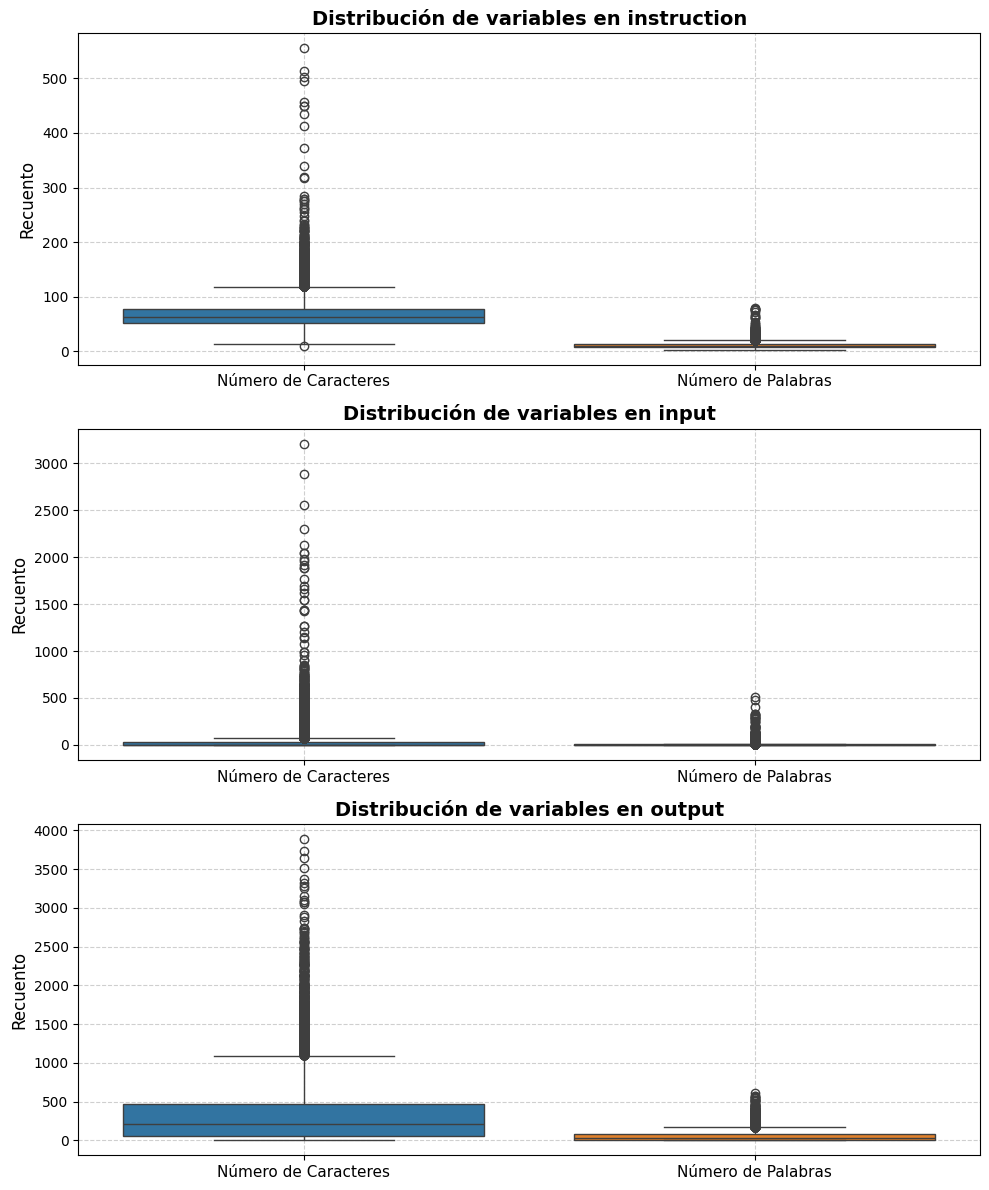

In [45]:
# Revisamos si hay outliers
fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # 3 filas, 1 columna

# Boxplot para 'instruction'
# Changed column names to match the ones created earlier
sns.boxplot(data=final_df[['instruction_char_count', 'instruction_word_count']], ax=axes[0])
axes[0].set_ylabel("Recuento", fontsize=12)
axes[0].set_title("Distribución de variables en instruction", fontsize=14, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Número de Caracteres', 'Número de Palabras'], fontsize=11)

# Boxplot para 'input'
# Changed column names to match the ones created earlier
sns.boxplot(data=final_df[['input_char_count', 'input_word_count']], ax=axes[1])
axes[1].set_ylabel("Recuento", fontsize=12)
axes[1].set_title("Distribución de variables en input", fontsize=14, fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Número de Caracteres', 'Número de Palabras'], fontsize=11)

# Boxplot para 'output'
# Changed column names to match the ones created earlier
sns.boxplot(data=final_df[['output_char_count', 'output_word_count']], ax=axes[2])
axes[2].set_ylabel("Recuento", fontsize=12)
axes[2].set_title("Distribución de variables en output", fontsize=14, fontweight='bold')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Número de Caracteres', 'Número de Palabras'], fontsize=11)

plt.tight_layout()
plt.show()

In [46]:
# Función para eliminar outliers
def eliminar_outliers(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Lista de columnas donde queremos eliminar outliers
# Changed column names to match the ones created earlier
columnas_outliers = [
    'instruction_char_count',
    'instruction_word_count',
    'input_char_count',
    'input_word_count',
    'output_char_count',
    'output_word_count'
]

df_final_limpio = eliminar_outliers(final_df.copy(), columnas_outliers)

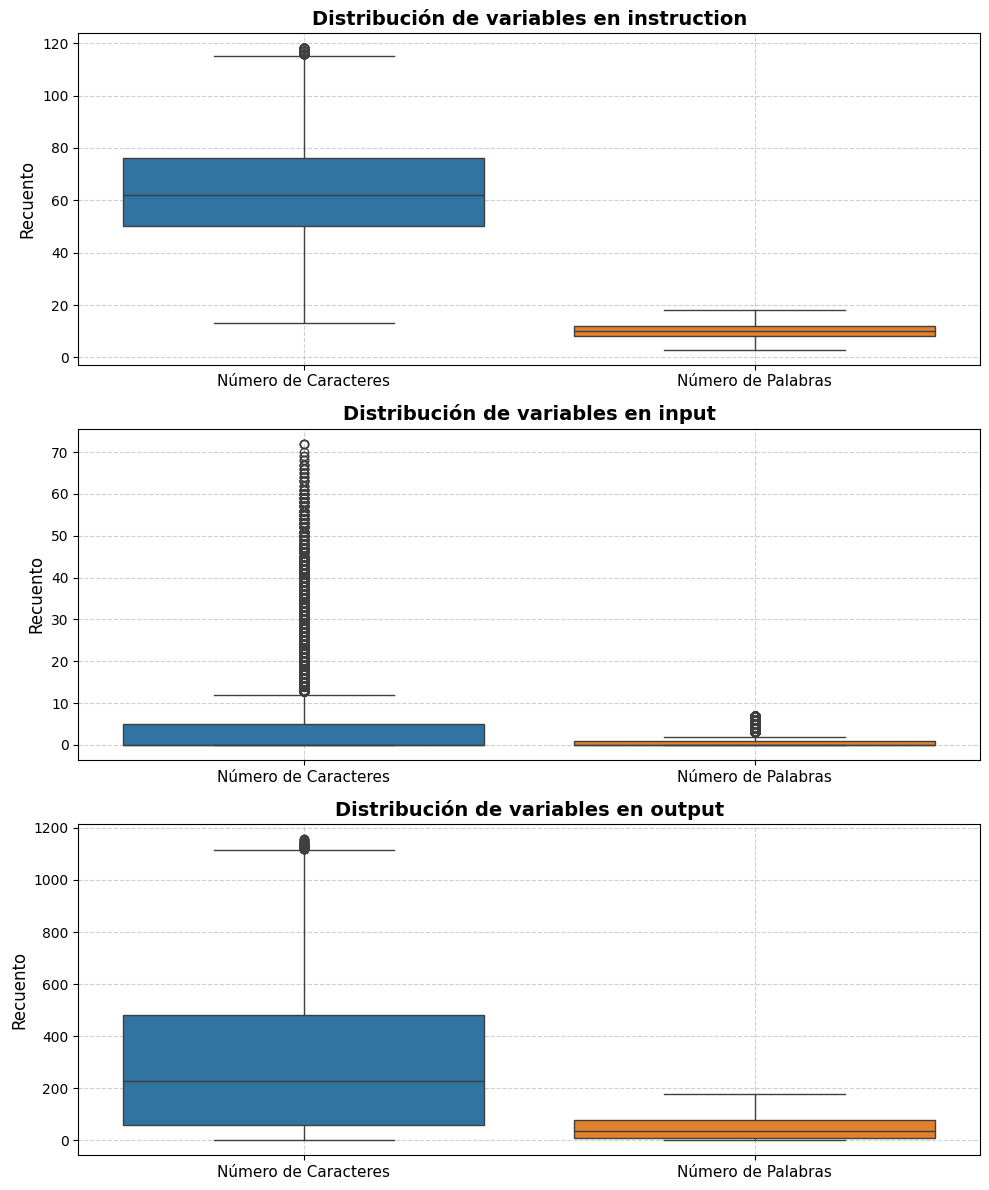

In [47]:
# Revisamos los outliers en el nuevo dataset limpio (podemos observar que el metodo IQR no es perfecto, ya que quedan algunos outliers)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # 3 filas, 1 columna

# Boxplot para 'instruction'
# Corrected column names to match those created in previous steps
sns.boxplot(data=df_final_limpio[['instruction_char_count', 'instruction_word_count']], ax=axes[0])
axes[0].set_ylabel("Recuento", fontsize=12)
axes[0].set_title("Distribución de variables en instruction", fontsize=14, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Número de Caracteres', 'Número de Palabras'], fontsize=11)

# Boxplot para 'input'
# Corrected column names to match those created in previous steps
sns.boxplot(data=df_final_limpio[['input_char_count', 'input_word_count']], ax=axes[1])
axes[1].set_ylabel("Recuento", fontsize=12)
axes[1].set_title("Distribución de variables en input", fontsize=14, fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Número de Caracteres', 'Número de Palabras'], fontsize=11)

# Boxplot para 'output'
# Corrected column names to match those created in previous steps
sns.boxplot(data=df_final_limpio[['output_char_count', 'output_word_count']], ax=axes[2])
axes[2].set_ylabel("Recuento", fontsize=12)
axes[2].set_title("Distribución de variables en output", fontsize=14, fontweight='bold')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Número de Caracteres', 'Número de Palabras'], fontsize=11)

plt.tight_layout()
plt.show()

In [48]:
# dataset final despues de la limpieza de datos
df_final_limpio

,instruction,input,output,instruction_words,instruction_punctuation,input_words,input_punctuation,output_words,output_punctuation,instruction_tokens,...,input_word_count,input_char_count,output_word_count,output_char_count,instruction_word_outliers,instruction_char_outliers,input_word_outliers,input_char_outliers,output_word_outliers,output_char_outliers
0,¿Qué significa DNA?,NaN,DNA significa ácido desoxirribonucleico.,"Qué, significa, DNA",?,NaN,NaN,"DNA, significa, ácido, desoxirribonucleico",.,"[¿Qué, significa, DNA, ?]",...,0,0,4,40,974,1416,4763,4954,1125,1061
1,¿Cuál es la capital de Francia?,NaN,La capital de Francia es París.,"Cuál, es, la, capital, de, Francia",?,NaN,NaN,"La, capital, de, Francia, es, París",.,"[¿Cuál, es, la, capital, de, Francia, ?]",...,0,0,6,31,974,1416,4763,4954,1125,1061
2,Identifica el que no encaja.,"Twitter, Instagram, Telegram",Telegram,"Identifica, el, que, no, encaja",.,"Twitter, Instagram, Telegram",",, ,",Telegram,NaN,"[Identifica, el, que, no, encaja, .]",...,3,28,1,8,974,1416,4763,4954,1125,1061
3,Traduisez la phrase suivante en français.,I miss you,Je te manque.,"Traduisez, la, phrase, suivante, en, français",.,"I, miss, you",NaN,"Je, te, manque",.,"[Traduisez, la, phrase, suivante, en, français...",...,3,10,3,13,974,1416,4763,4954,1125,1061
4,Encuentra la capital de España.,NaN,La capital de España es Madrid.,"Encuentra, la, capital, de, España",.,NaN,NaN,"La, capital, de, España, es, Madrid",.,"[Encuentra, la, capital, de, España, .]",...,0,0,6,31,974,1416,4763,4954,1125,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51934,Crea una clase contenedor que contenga dos val...,NaN,class Container { \n private String value1;\n...,"Crea, una, clase, contenedor, que, contenga, d...",.,NaN,NaN,"class, Container, private, String, value1, pri...",";, ;, (, ,, ), ., =, ;, ., =, ;, (, ), ;, (, )...","[Crea, una, clase, contenedor, que, contenga, ...",...,0,0,55,456,974,1416,4763,4954,1125,1061
51935,Escriba un párrafo introductorio sobre una per...,Michelle Obama,Michelle Obama es una mujer inspiradora que se...,"Escriba, un, párrafo, introductorio, sobre, un...",.,"Michelle, Obama",NaN,"Michelle, Obama, es, una, mujer, inspiradora, ...","., ,, ,, ., ,, ,, ,, ., ,, .","[Escriba, un, párrafo, introductorio, sobre, u...",...,2,14,111,651,974,1416,4763,4954,1125,1061
51936,Desarrolla una estrategia para negociar mejore...,NaN,Al negociar mejores salarios en el lugar de tr...,"Desarrolla, una, estrategia, para, negociar, m...",.,NaN,NaN,"Al, negociar, mejores, salarios, en, el, lugar...",",, ., ;, ,, ., ,, ., ,, ., ,, ,, ., ,, ., ,, .","[Desarrolla, una, estrategia, para, negociar, ...",...,0,0,120,765,974,1416,4763,4954,1125,1061
51937,Crea un cuestionario para un tema de tu elección.,Scooby-Doo,"1. ¿En qué año se estrenó la serie Scooby-Doo,...","Crea, un, cuestionario, para, un, tema, de, tu...",.,Scooby-Doo,NaN,"1, En, qué, año, se, estrenó, la, serie, Scoob...","., ,, ?, ., ., ., ., ., ?, ., "", "", ., "", "", ....","[Crea, un, cuestionario, para, un, tema, de, t...",...,1,10,104,583,974,1416,4763,4954,1125,1061


Finalmente guardamos el dataset limpio como un csv

In [49]:
df_final_limpio.to_csv('df_final_limpio.csv', index=False)

#Visualización

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


    Distribución de número de palabras en instruction, input y output

<ipython-input-52-b57b73b04ff2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['instruction','input','output'], y=df_final_limpio[['instruction_word_count','input_word_count','output_word_count']].mean(), palette='viridis')


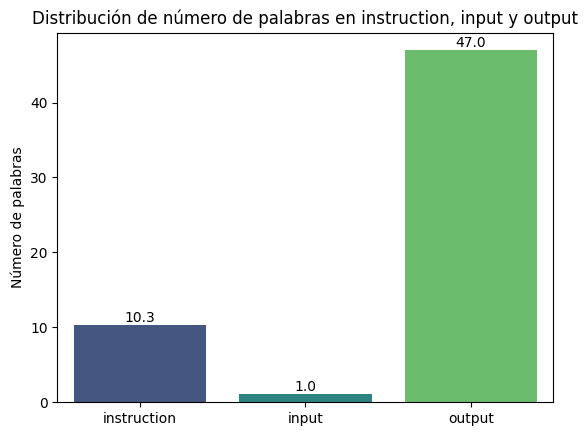

In [52]:
sns.barplot(x=['instruction','input','output'], y=df_final_limpio[['instruction_word_count','input_word_count','output_word_count']].mean(), palette='viridis')
plt.title('Distribución de número de palabras en instruction, input y output')
plt.ylabel('Número de palabras')

for i, (category, count) in enumerate(zip(['instruction', 'input', 'output'],
                                          df_final_limpio[['instruction_word_count', 'input_word_count', 'output_word_count']].mean())):
    plt.text(i, count + 0.1, f"{count:.1f}", ha='center', va='bottom', fontsize=10)

plt.show()

Interpretación:

En el gráfico se observa la distibución del número promedio de palabras en instruction, input y output. Esto da a entender que las instrucciones son detalladas, los input breves, probablemente actuando como complementos específicos. Por el lado de los outputs, son extensos, lo que inidca respuestas detalladas.

Este descubrimiento indica que nuestro modelo debe ser capaz de interpretar instrucciones concisas y entradas mínimas para generar respuestas extensas y completas.

    Distribución de número de palabras en instruction

<ipython-input-55-b8b3ec9ac752>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='instruction_word_count', y='count',


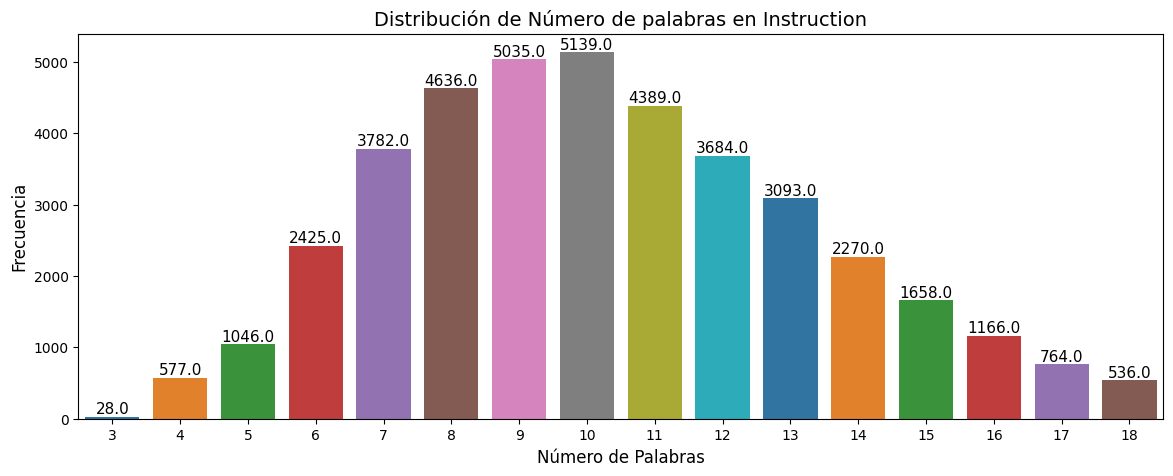

In [55]:
palette = sns.color_palette(n_colors=len(df_final_limpio['instruction_word_count'].unique()))
plt.figure(figsize=(14, 5))
ax = sns.barplot(x='instruction_word_count', y='count',
            data=df_final_limpio.groupby('instruction_word_count').size().to_frame(name='count').reset_index(), palette=palette)

plt.title('Distribución de Número de palabras en Instruction', fontsize=14)
plt.xlabel('Número de Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

plt.show()

Interpretación:

Del gráfico podemos decir que comunmente el numero de palabras en las instruciones es de 10, lo cual es breve pero suficiente para trasnmitir información información clara y específica. Se pude decir que los usuarios tienden a proporcionar indicaciones concisas, enfocadas a taras contretas o preguntas directas.

    Distribución de número de palabras en input

<ipython-input-80-bc494369e0f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='input_word_count', y='count',


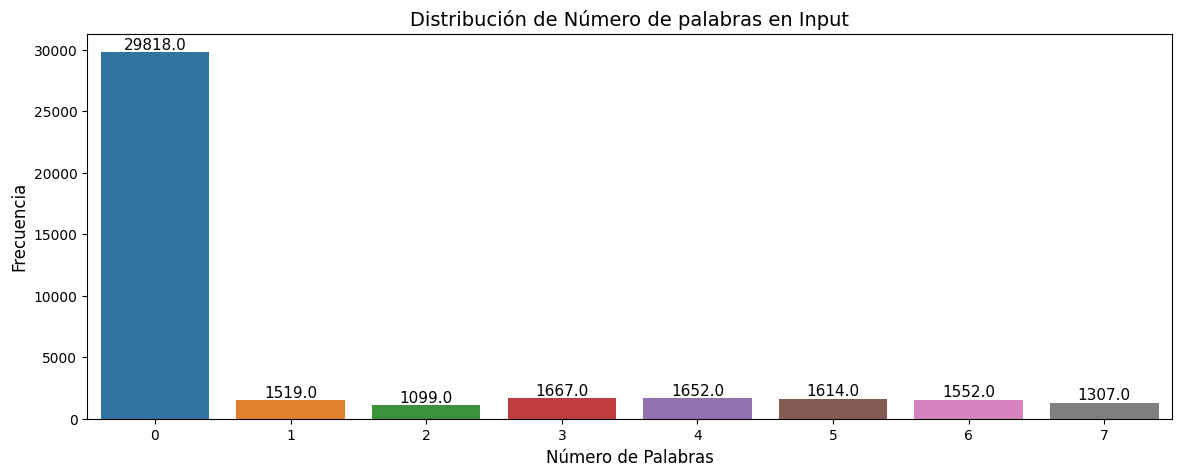

In [80]:
palette = sns.color_palette(n_colors=len(df_final_limpio['input_word_count'].unique()))
plt.figure(figsize=(14, 5))
ax = sns.barplot(x='input_word_count', y='count',
            data=df_final_limpio.groupby('input_word_count').size().to_frame(name='count').reset_index(), palette=palette)

plt.title('Distribución de Número de palabras en Input', fontsize=14)
plt.xlabel('Número de Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

plt.show()

Interpretación:

Del gráfico podemos decir que en la mayoría de los casos no se proporciona un contexto adicional o información complementaria junto a la instrucción principal. Lo cual sugiere que las instrucciones suelen ser autosuficientes y contienen toda la información necesaria para que el modelo genere una respuesta.

    Distribución de número de palabras en output

<ipython-input-63-1a6129c8c3e4>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df_final_limpio.groupby('word_count_range').size().to_frame(name='count').reset_index()
<ipython-input-63-1a6129c8c3e4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='word_count_range', y='count', data=data, palette=palette)


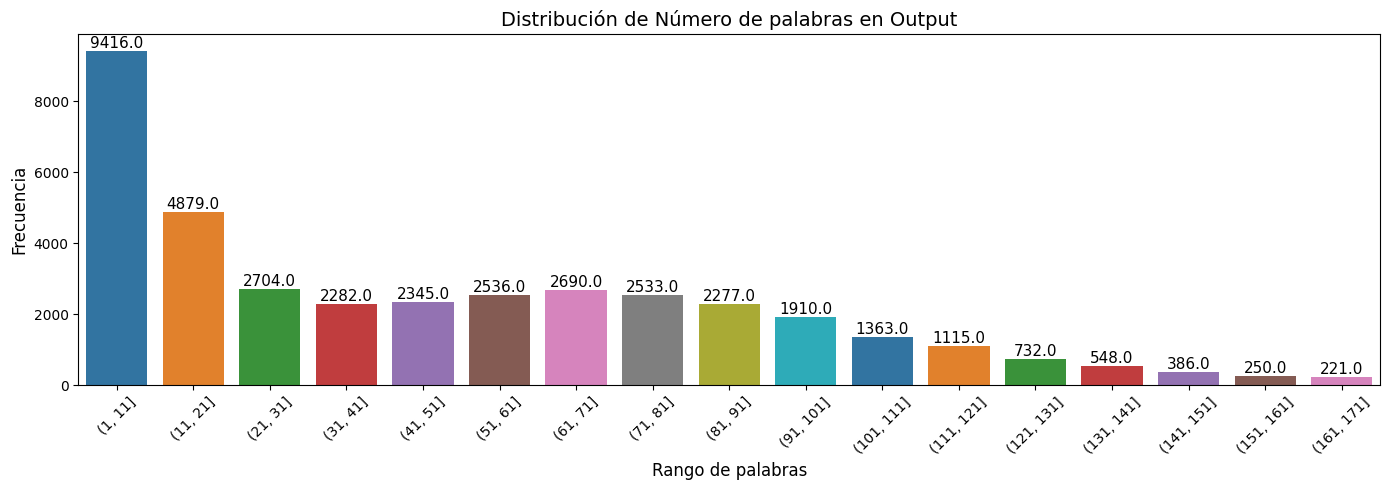

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

bins = range(1, df_final_limpio['output_word_count'].max() + 1, 10)
df_final_limpio['word_count_range'] = pd.cut(df_final_limpio['output_word_count'], bins=bins)
data = df_final_limpio.groupby('word_count_range').size().to_frame(name='count').reset_index()

palette = sns.color_palette(n_colors=len(data))
plt.figure(figsize=(14, 5))
ax = sns.barplot(x='word_count_range', y='count', data=data, palette=palette)

plt.title('Distribución de Número de palabras en Output', fontsize=14)
plt.xlabel('Rango de palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Interpretación:

Del gráfico podemos decir que las respuestas generadas son en su mayoría breves y directas. Lo cual indicaría que las tareas o consultas planteadas requieren de respuestas específicas o concisas, como definiciones, confirmaciones, opciones simples o resultados precisos.

    ¿Existe una correlación entre la longitud del instruction y la longitud del output?

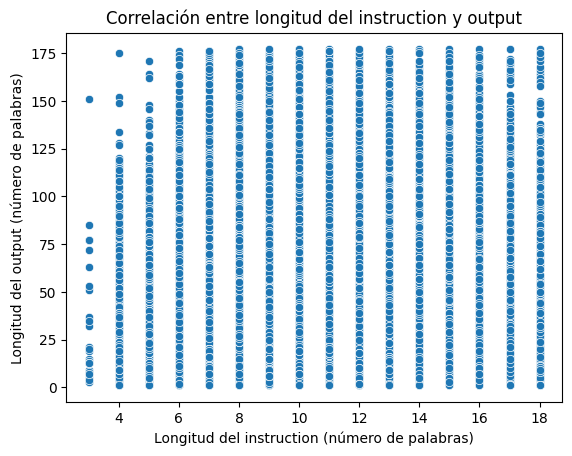

Coeficiente de correlación: 0.11


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='instruction_word_count', y='output_word_count', data=df_final_limpio)
plt.title('Correlación entre longitud del instruction y output')
plt.xlabel('Longitud del instruction (número de palabras)')
plt.ylabel('Longitud del output (número de palabras)')
plt.show()

# Calcular la correlación
correlation = df_final_limpio['instruction_word_count'].corr(df_final_limpio['output_word_count'])
print(f'Coeficiente de correlación: {correlation:.2f}')

<Figure size 1400x600 with 0 Axes>

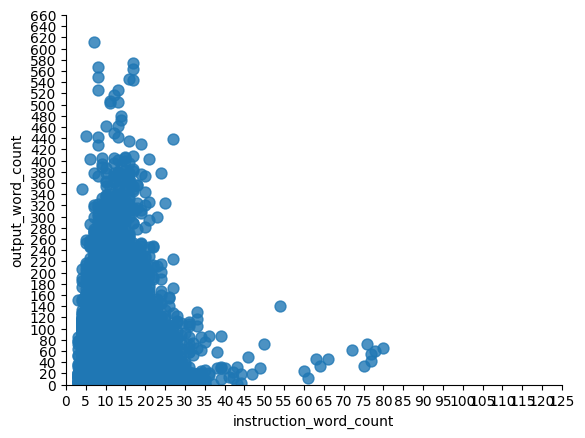

In [104]:
import matplotlib.pyplot as plt

# Crear una figura con tamaño ajustado y DPI alto
plt.figure(figsize=(14, 6), dpi=100)  # Aumentamos el DPI para una mejor resolución

# Generar el gráfico de dispersión
final_df.plot(kind='scatter', x='instruction_word_count', y='output_word_count', s=62, alpha=.8)

# Personalizar los ejes y estética
plt.gca().spines[['top', 'right']].set_visible(False)
# Ajustar los límites de los ejes
plt.xlim(0, 50)  # Ajusta según tus datos
plt.ylim(0, 300)  # Ajusta según tus datos

# Personalizar los ejes y estética
plt.gca().spines[['top', 'right']].set_visible(False)

# Establecer los intervalos de los ejes en 50
plt.xticks(range(0, int(final_df['instruction_word_count'].max()) + 50, 5))
plt.yticks(range(0, int(final_df['output_word_count'].max()) + 50, 20))

# Mostrar el gráfico
plt.show()

    ¿Qué tipos de palabras son más frecuentes en instruction, input y output?

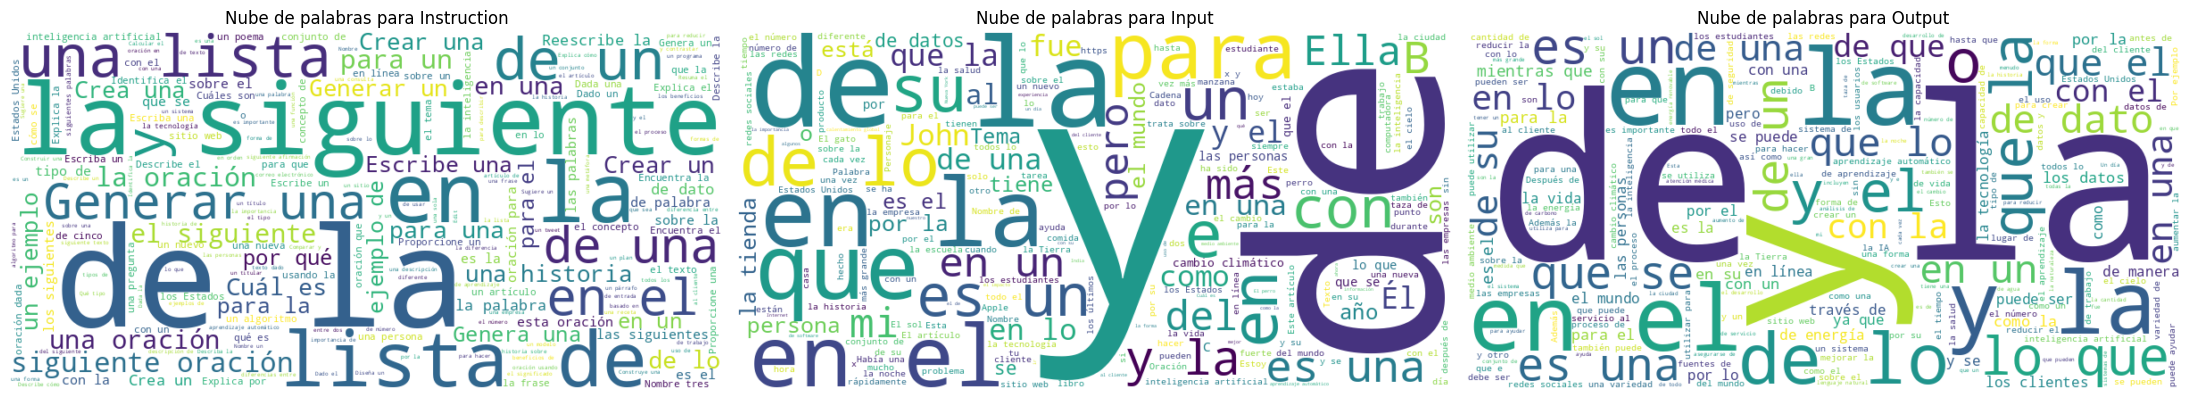

In [66]:
from wordcloud import WordCloud

# Crear nubes de palabras para cada columna
columns = ['instruction', 'input', 'output']
plt.figure(figsize=(22, 10))

for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    text = ' '.join(final_df[col].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras para {col.capitalize()}')

plt.tight_layout()
plt.show()

Interpretación:

Una nube de palabras muestra las palabras más comunes en las columnas instruction, input y output. En este caso observamos que el conector y es la palabra más común en input y output. Por lo que entendemos que se tiene la tendencia de conectar múltiples ideas. Además, ello nos ayuda a determinar el largo de los caracteres de entrenamiento.

    ¿Qué frases o palabras clave en los prompt indican intencione específicas del usuario (solicitar información, comandos, expresar emociones)?

<ipython-input-79-e9b21243676b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette=palette)


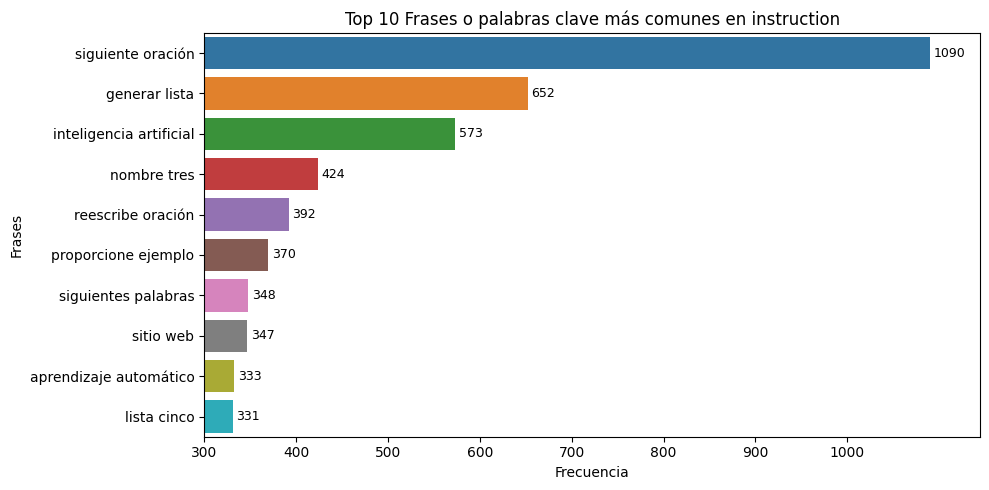

In [79]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
# Extraer bigramas
spanish_stop_words = stopwords.words('spanish')
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=spanish_stop_words) # Use the list of Spanish stop words
X = vectorizer.fit_transform(df_final_limpio['instruction_tokens'].apply(' '.join))
bigrams = Counter(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))

# Mostrar los bigramas/trigramas más comunes
top_ngrams = bigrams.most_common(10)
ngrams, counts = zip(*top_ngrams)


palette = sns.color_palette(n_colors=len(ngrams))
plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=ngrams, palette=palette)
plt.title('Top 10 Frases o palabras clave más comunes en instruction')
plt.xlabel('Frecuencia')
plt.ylabel('Frases')

# Personalizar el eje y
plt.xlim(300, None)
plt.xticks(range(300, 1100, 100))

for i, (count, ngram) in enumerate(zip(counts, ngrams)):
    plt.text(count + 4, i, str(count), ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Interpretación:

El gráfico muestra las 10 frases o palabras clave más comunes en las instrucciones. Frases como siguiente oración y generar lista refleja solicitudes de comandos claros y acciones concretas. Términos como IA y aprendizaje automático sugieren consultas relacionadas a temas informativos.  Por otro lado, frases como proporciones ejemplo o resscribe oración implican una intención de obtener explicaciones.

En general, estas palabras clave evidencian que los usuarios suelen buscar interacciones orientadas a tareas específicas, asistencia técnica y generación de contenido.

    ¿Que tipos de signos de puntuación son más frecuentes en cada columna?

<ipython-input-78-b3d8f2109bf9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(punctuation_counts.keys()), y=list(punctuation_counts.values()), palette=palette)
<ipython-input-78-b3d8f2109bf9>:14: UserWarning: 
The palette list has fewer values (10) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(punctuation_counts.keys()), y=list(punctuation_counts.values()), palette=palette)


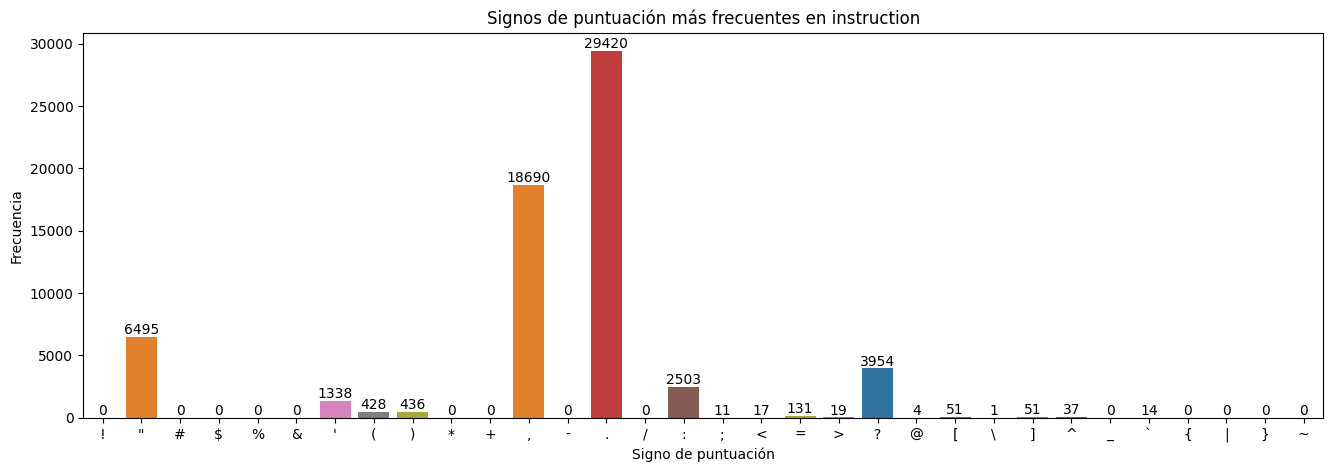

In [78]:
import string

# Contar los signos de puntuación, manejando valores nulos o float
punctuation_counts = {
    p: df_final_limpio['instruction_punctuation']
        .apply(lambda x: str(x).count(p) if not isinstance(x, float) else 0)  # Convert to string if not float, else count as 0
        .sum()
    for p in string.punctuation
}

# Graficar
plt.figure(figsize=(16, 5))
palette = sns.color_palette(n_colors=len(ngrams))  # Assuming 'ngrams' is defined elsewhere
sns.barplot(x=list(punctuation_counts.keys()), y=list(punctuation_counts.values()), palette=palette)
plt.title('Signos de puntuación más frecuentes en instruction')
plt.xlabel('Signo de puntuación')
plt.ylabel('Frecuencia')

for i, (punctuation, count) in enumerate(punctuation_counts.items()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Interpretación:

El gráfico muestra que los signos de puntuación más frecuentes en las instruciones son el punto(.) con 29,420 apariciones, seguido de la coma (,) con 18,690, y las comillas dobles (") con 6,495. También se destacan otros signos como el apóstrofo (') y los paréntesis, aunque con menor frecuencia (1,338 y 428, respectivamente). La alta prevalencia del punto y la coma indica que las instrucciones suelen estar estructuradas en oraciones completas y organizadas, reflejando un estilo formal o detallado.

    ¿Que proporción de tokens son stopwords en cada columna?

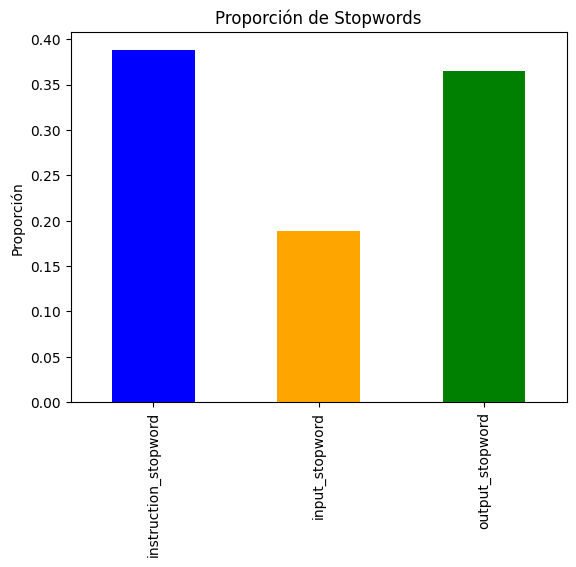

In [ ]:
# Cálculo de proporciones
df_final_limpio['instruction_stopword'] = df_final_limpio['instruction_stopword_count'] / df_final_limpio['instruction_word_count']
df_final_limpio['input_stopword'] = df_final_limpio['input_stopword_count'] / df_final_limpio['input_word_count']
df_final_limpio['output_stopword'] = df_final_limpio['output_stopword_count'] / df_final_limpio['output_word_count']

# Gráfico de barras
stopword_data = df_final_limpio[['instruction_stopword', 'input_stopword', 'output_stopword']].mean()
stopword_data.plot(kind='bar', color=['blue', 'orange', 'green'], title="Proporción de Stopwords")

plt.ylabel('Proporción')
plt.show()

Interpretación:

  Las columnas instruction_stopword y output_stopword son las que presentan una mayor proposción de stopwords, con valores cercanos al 40%. Lo cual sugiere que existe un alto porcentaje de preposiciones, articulos y conjunciones. Además, el uso frecuente de estas palabras funcionales podría reflejar que las instrucciones priorizan la claridad y la conexión lógica entre ideas, haciendo énfasis en relaciones espaciales, temporales o causales (preposiciones), identificación de elementos específicos (artículos) y la cohesión entre oraciones o frases (conjunciones).
  
  Por otra parte, la alta proporción de stopwords en instruction y output podría hacer necesario un proceso de eliminación, para que así el modelo a entrenar se enfoque en el significado semántico.